In [51]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import bruce

# y, sr = librosa.load("../data/example_audio_FwVYUHKoLtQ_000034.wav", sr=100000)

stim = bruce.stimulus.from_file('../data/example_audio_FwVYUHKoLtQ_000034.wav', True)
y = np.array(stim.data)
sr = stim.sampling_rate


loading file: ../data/example_audio_FwVYUHKoLtQ_000034.wav
|======================================|
Num Channels: 1
Num Samples Per Channel: 160029
Sample Rate: 16000
Bit Depth: 16
Length in Seconds: 10.0018
|======================================|


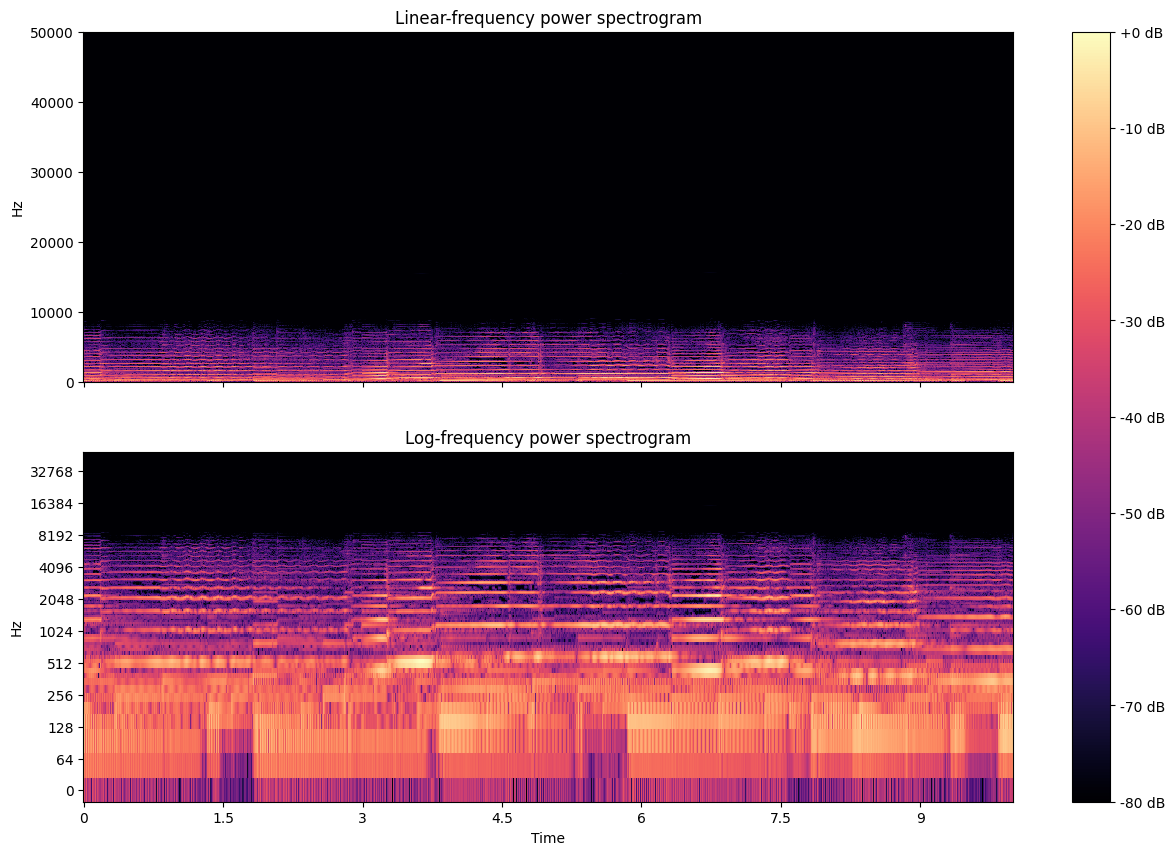

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

100000

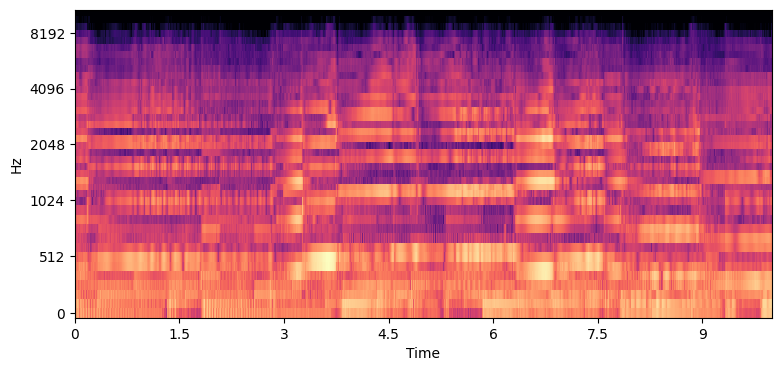

In [63]:
fig, ax = plt.subplots(figsize=(9, 4))
fmax = 10500
n_mels = 40
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=fmax, ax=ax)

sr

In [65]:
y = librosa.feature.inverse.mel_to_audio(S, sr=sr, hop_length=512)

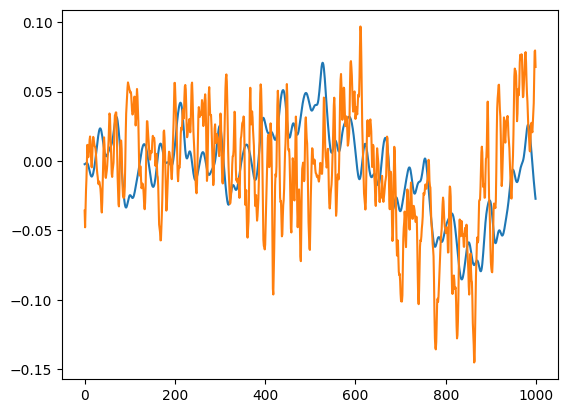

In [66]:
plt.plot(stim.data[:1000])
plt.plot(y[:1000])